## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata,study_results, on = "Mouse ID", how ="outer")
# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(df.groupby("Mouse ID"))

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicated_Mice_df= df[df.duplicated(["Mouse ID","Timepoint"])]
Duplicated_Mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
Duplicated_Mice_df["Mouse ID"].unique()

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_Mice_All_data_df= df.loc[df["Mouse ID"]==Duplicated_Mice_df.iloc[0,0],:]
duplicated_Mice_All_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Cleaned_df= df.drop(df[df["Mouse ID"]=="g989"].index)
Cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
print(f"Number of unique mice in clean dataframe:{len(Cleaned_df.groupby('Mouse ID'))}")
print(f"Number of mice used in clean dataframe:{len(Cleaned_df['Mouse ID'])}")

Number of unique mice in clean dataframe:248
Number of mice used in clean dataframe:1880


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean_TumorVolume = Cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_TumorVolume = Cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_TumorVolume = Cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_TumorVolume = Cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_TumorVolume = Cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

SummaryStatistics_df = pd.DataFrame({"mean":mean_TumorVolume,
                                     "median":median_TumorVolume,
                                     "variance":variance_TumorVolume,
                                     "standard deviation":std_TumorVolume ,
                                     "SEM":sem_TumorVolume
                                    })
SummaryStatistics_df

,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
Cleaned_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

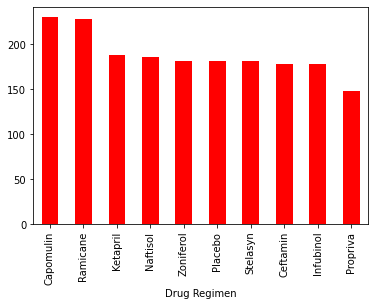

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
Cleaned_df.sort_values("Drug Regimen")
Total_Mice_Per_Treatment = Cleaned_df.groupby("Drug Regimen").count().sort_values("Mouse ID",ascending = False)["Mouse ID"]

Total_Mice_Per_Treatment.plot(kind="bar", facecolor="red")


Text(0, 0.5, 'number of mice throughout the study')

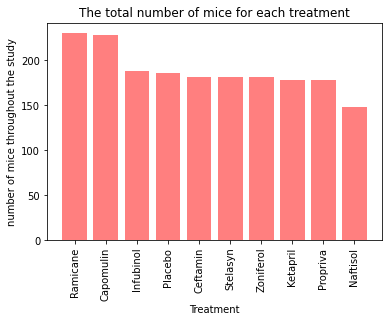

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Set x axis 
x_axis = np.arange(len(Total_Mice_Per_Treatment))
# Create a bar chart based upon the above data
plt.bar(x_axis, Total_Mice_Per_Treatment, color='r', alpha=0.5, align="center")
# Set tick locations
plt.xticks(x_axis,Cleaned_df["Drug Regimen"].unique(),rotation="vertical")

# Set a Title and labels
plt.title("The total number of mice for each treatment")
plt.xlabel("Treatment")
plt.ylabel("number of mice throughout the study")

<AxesSubplot:title={'center':'Distribution of female versus male mice'}, ylabel='Sex'>

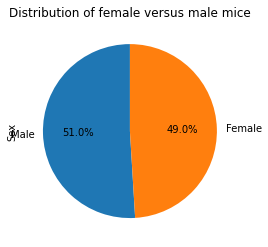

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_distribution = Cleaned_df["Sex"].value_counts()
sex_distribution.plot(kind="pie", y='Sex', autopct="%1.1f%%", title=("Distribution of female versus male mice"),startangle=90)



(-1.1041200173094385,
 1.1079114197007642,
 -1.1065502689644005,
 1.1003119175697333)

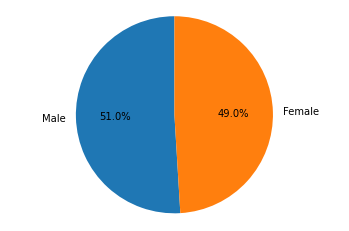

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Male", "Female"]
# Creates the pie chart
plt.pie(sex_distribution, labels=labels, autopct="%1.1f%%",startangle=90)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
lastTimepointperMouse = pd.DataFrame(Cleaned_df.groupby("Mouse ID")["Timepoint"].max()).reset_index()
lastTimepointperMouse= lastTimepointperMouse.rename(columns={"Timepoint":"Last_timepoint"})
lastTimepointperMouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(Cleaned_df,lastTimepointperMouse, on="Mouse ID")
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [15]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume_df = pd.DataFrame(merged_df[(merged_df["Drug Regimen"]== treatment) &(merged_df["Timepoint"]==merged_df["Last_timepoint"])])
    
    
    # add subset 
    subset = final_tumor_volume_df["Tumor Volume (mm3)"]
    tumor_vol_data.append(subset)
    
    # Determine outliers using upper and lower bounds
    quartiles = subset.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outlier_data = subset.loc[(subset< lower_bound) | (subset > upper_bound)]
    print(f"{treatment}\'s potential outliers:{outlier_data}")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:669    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


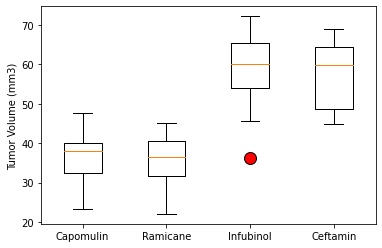

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data,flierprops ={'markersize':12,'markeredgecolor': 'black','markerfacecolor':'red'})
plt.xticks(range(1,len(treatments)+1),treatments)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

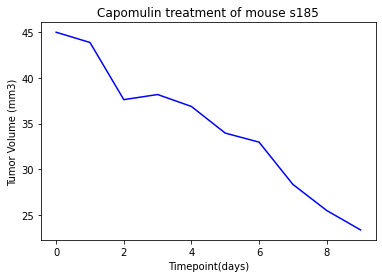

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
data = pd.DataFrame(Cleaned_df[(Cleaned_df["Drug Regimen"]== "Capomulin") & (Cleaned_df["Mouse ID"]=="s185")])
mouse_tumor_data = data["Tumor Volume (mm3)"]

plt.plot(range(0,len(data["Timepoint"])), mouse_tumor_data, color="blue")
plt.title("Capomulin treatment of mouse s185")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

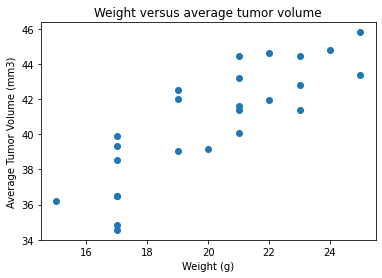

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_data = pd.DataFrame(Cleaned_df[(Cleaned_df["Drug Regimen"]== "Capomulin")])
weight_df= pd.DataFrame(Capomulin_data.groupby("Mouse ID").agg(Weight =pd.NamedAgg(column="Weight (g)",aggfunc="first"),
                                                  Tumor_Volume = pd.NamedAgg(column="Tumor Volume (mm3)",aggfunc="mean"))).reset_index()
plt.scatter(weight_df["Weight"],weight_df["Tumor_Volume"])
plt.title("Weight versus average tumor volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


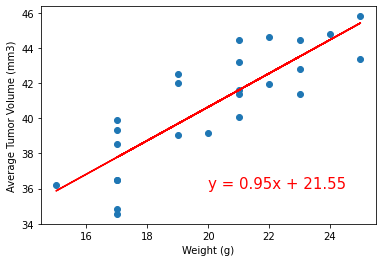

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Calculate the correlation coefficient between mouse weight and average tumor volume
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(weight_df['Weight'],weight_df['Tumor_Volume'])[0],2)}")

#linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = weight_df["Weight"]
y_values = weight_df["Tumor_Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()